<a href="https://colab.research.google.com/github/kevin-bcs/imagesprocessing/blob/main/Practica8%3A%20Transformada%20de%20Hough/python/Pr%C3%A1ctica8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!wget -nc "https://raw.githubusercontent.com/Jegovila/cursoVR/main/Practica8%3A%20Transformada%20de%20Hough/matlab/atico.jpg"

File ‘atico.jpg’ already there; not retrieving.



Importación de las librerías necesarias para el procesamiento y visualización de imágenes


In [85]:
from matplotlib import cm
from matplotlib.patches import Rectangle
from skimage.transform import hough_line, hough_line_peaks
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow


Crear imagen de muestra con dos líneas diagonales

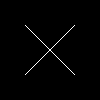

In [86]:
image = np.zeros((100, 100)) # Crea una imagen en negro de 100x100 pixeles
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255 # Añade una línea diagonal blanca de arriba a la izquierda a abajo a la derecha
image[idx, idx] = 255 # Añade una línea diagonal blanca de abajo a la izquierda a arriba a la derecha

cv2_imshow(image) # Muestra la imagen de muestra creada

Carga y procesamiento de una imagen real para la detección de bordes


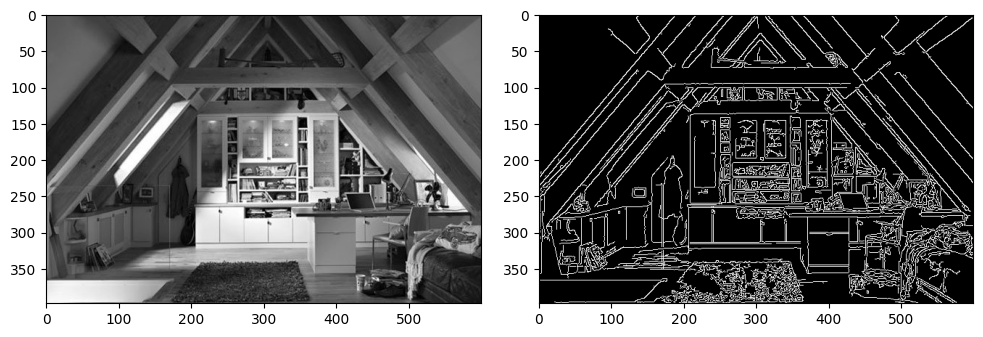

In [98]:
image = cv2.imread("atico.jpg", cv2.IMREAD_GRAYSCALE) # Carga la imagen en escala de grises
#image = cv2.resize(image, (0,0), fx=0.25, fy=0.25)

fig, prev = plt.subplots(1, 2, figsize=(10,7))
fig.tight_layout()
plt.clf()

plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.subplot(1,2,2)
image = cv2.Canny(image, 50, 200, None, 3) # Aplica el algoritmo de Canny para la detección de bordes
plt.imshow(255 - image, cmap="binary")


# Aplicación de la transformada de Hough para la detección de líneas


In [ ]:
h, theta, d = hough_line(image) # Realiza la transformada de Hough
_, t_peak, d_peak = hough_line_peaks(h, theta, d) # Identifica los picos en el espacio de Hough


# Configuración de la visualización de la imagen original y la imagen procesada


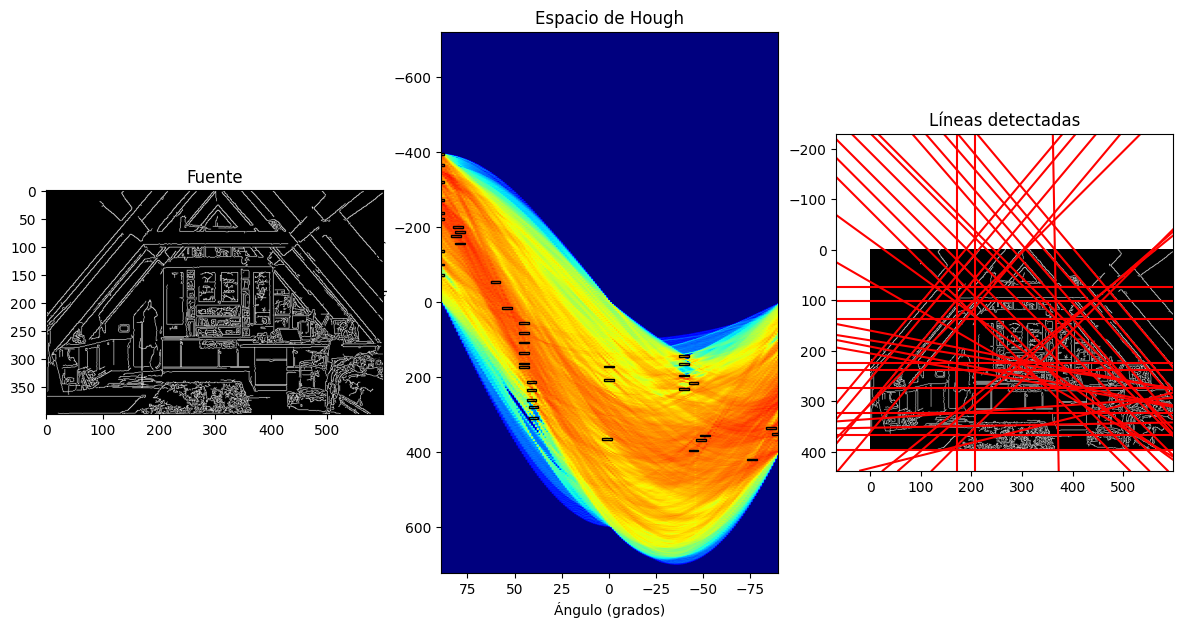

In [117]:

# Generación de subplots para visualización de resultados
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))
plt.tight_layout()# Ajusta automáticamente los subplots para que encajen en el layout del figure

# Muestra la imagen original o procesada en el primer subplot
ax0.imshow(image, cmap=cm.gray) # Utiliza un mapa de colores en escala de grises
ax0.set_title('Fuente')

# Visualización del espacio de Hough en el segundo subplot
h_space = np.log(1 + h)  # Utiliza el logaritmo para mejorar la visualización del espacio de Hough
extent = [np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]] # Define los límites de la visualización
ax1.imshow(h_space, extent=extent, cmap=cm.jet, aspect='auto') # Usa un colormap jet para una mejor diferenciación de valores
ax1.set_title('Espacio de Hough')
ax1.set_xlabel('Ángulo (grados)')
ax1.set_ylabel('Distancia (píxeles)')

# Resalta los picos detectados en el espacio de Hough con rectángulos
for th, dist in zip(t_peak, d_peak):
    rect = Rectangle((-np.rad2deg(th)-2.5, dist-2.5), 5, 5, edgecolor='black', facecolor='none') # Crea un rectángulo para cada pico
    ax1.add_patch(rect) # Añade el rectángulo al subplot del espacio de Hough

# Muestra la imagen con las líneas detectadas en el tercer subplot
ax2.imshow(image, cmap=cm.gray)# Muestra la misma imagen en escala de grises
row1, col1 = image.shape # Obtiene las dimensiones de la imagen
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])   # Calcula el punto de origen de la línea
    ax2.axline((x0, y0), slope=np.tan(angle + np.pi/2), color="red") # Dibuja la línea detectada
ax2.set_title('Líneas detectadas')
#ax2.set_axis_off() # Desactiva los ejes para una visualización más limpia

plt.show()# Muestra todos los subplots


**Para** mejor visualización del espacio de parámetros de Hough.

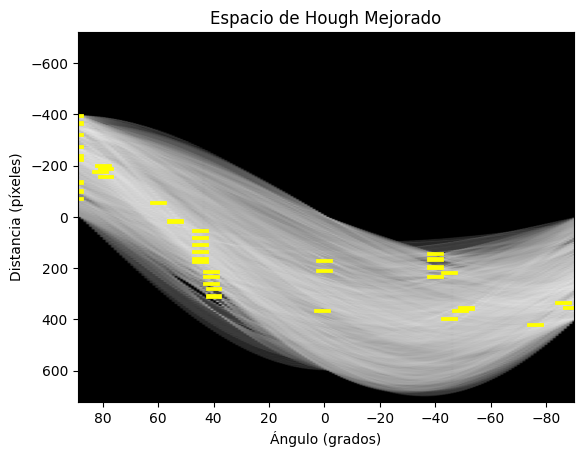

In [119]:
fig, ax3 = plt.subplots()

# Ajustar el colormap y la visualización del espacio de Hough
h_space = np.log(1 + h)
extent = [np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]]
ax3.imshow(h_space, extent=extent, cmap=cm.gray, aspect='auto')  # Usamos cm.jet para mejor contraste
ax3.set_title('Espacio de Hough Mejorado')
ax3.set_xlabel('Ángulo (grados)')
ax3.set_ylabel('Distancia (píxeles)')

# Usar rectángulos para resaltar cada pico, similar a cómo se hizo en otro subplot
for th, dist in zip(t_peak, d_peak):
    rect = Rectangle((-np.rad2deg(th)-2.5, dist-2.5), 5, 5, edgecolor='yellow', facecolor='none', linewidth=2)
    ax3.add_patch(rect)
    # Opcional: agregar texto si es necesario para clarificar
    #ax3.text(-np.rad2deg(th), dist, f'{int(-np.rad2deg(th))}°, {int(dist)}px', color='white', ha='center', va='center')

plt.show()